In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
from immatch.utils.hpatches_helper import eval_summary_matching
# # https://www.somersault1824.com/wp-content/uploads/2015/02/color-blindness-palette-e1423327633855.png

cbcolors={'cgreen':(26, 110, 53),
          'cgrass':(123, 252, 3),
          'cbrown':(161, 100, 56),
          'cyellow':(237, 187, 36),
          'cpurple':(177, 87, 250),
          'cpurblue' : (194, 207, 242),          
          'cgrey':(157, 163, 163),        
          'cblue':(66, 120, 245),
          'csky': (148, 250, 255),
          'corange':(245, 130, 69),
          'ccyan': (8, 189, 171),
          'crose' : (235, 101, 157),
          'cpink' : (255, 212, 212),
          'cred': (219, 15, 15),          
          'cdark': (0, 0, 0),
         }
cbcolors={k:(v[0]/255,v[1]/255,v[2]/255) for k,v in cbcolors.items()}

# Methods correspond to the saved cache files
methods = ['hesaff', 
           'hesaffnet',
           'DoG1024-AffNet-HardNet.m0.95',
           'LoFTR_outdoor_ds.im1024.m0.9', 
           'D2Net', 'R2D2', 'aslfeat',
           'CAPS_SuperPoint_r4', 'CAPS_SIFT',  
           'SuperPoint_r4', 'SuperGlue_r4.m0.9', 
           'SparseNCNet_N2000.im3200',
           'NCNet.im1024.m0.9',
           'TopicFM_model_best.im1024.m0.9',
           'Patch2Pix.im1024.m0.9'
          ]

# Legend names in the plot
names = ['HesAff+RootSIFT + NN', 
         'HAN+HN++ + NN',
         'DoGAffHardNet + SMNN',
         'LoFTR', 
         'D2-Net + NN', 'R2D2 + NN', 'ASLFeat + NN',
         'Superpoint+CAPS + NN', 'Sift+CAPS + NN',
         'SuperPoint + NN', 
         'Superpoint + SuperGlue',     
         'Sparse-NCNet', 
         'NCNet_adapted c0.9',
         'TopicFM',
         'Patch2Pix',
        ]

colors = [cbcolors['cdark'], 
          cbcolors['cpurblue'], cbcolors['cpurblue'], 
          cbcolors['cgrass'],  
          cbcolors['cgrey'], # cbcolors['ccyan'], 
          cbcolors['cbrown'],  
          cbcolors['cyellow'], cbcolors['corange'],  
          cbcolors['cblue'],  cbcolors['cgreen'], cbcolors['csky'],  
          cbcolors['crose'],  
          cbcolors['cpink'],  
          cbcolors['cred'], cbcolors['cpurple'],  ]

linestyles = ['-', 
              '-', '-.', 
              '-', 
              '-', '-', '-', 
              '-', '--', 
              '-', '-', 
              '--', 
              '--',               
              '-', '-',
             ]

print(len(methods), len(linestyles), len(colors), len(names))



/home/khangtg/anaconda3/envs/immatch/lib/python3.8/site-packages/tqdm-4.63.0-py3.8.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cannot use vispy, setting triangulate_corr as None
Can not import sparsencnet
15 15 15 15


## Load Precomputed Results

In [2]:
cache_dir = '../outputs/hpatches/cache'
errors = {}
for method in methods:
    output_file = os.path.join(cache_dir, method + '.npy')
    print('\n>>>{}'.format(method))
    if not os.path.exists(output_file):
        print(f'Error: can not load precomputed results!!')
        break
        
    print('Loading precomputed errors...')
    errors[method] = np.load(output_file, allow_pickle=True)
    print(eval_summary_matching(errors[method]))



>>>hesaff
Loading precomputed errors...
#Features: mean=6710 min=296 max=26021
#(Old)Matches: a=2852, i=1586, v=4027
#Matches: a=2852, i=1586, v=4027
MMA@[ 1  3  5 10] px:
a=[0.31 0.56 0.64 0.7 ]
i=[0.34 0.51 0.59 0.65]
v=[0.29 0.61 0.69 0.75]


>>>hesaffnet
Loading precomputed errors...
#Features: mean=3861 min=89 max=16326
#(Old)Matches: a=1960, i=1098, v=2760
#Matches: a=1960, i=1098, v=2760
MMA@[ 1  3  5 10] px:
a=[0.33 0.62 0.7  0.76]
i=[0.37 0.61 0.7  0.75]
v=[0.29 0.62 0.71 0.76]


>>>DoG1024-AffNet-HardNet.m0.95
Loading precomputed errors...
#Features: mean=1020 min=0 max=1026
#(Old)Matches: a=164, i=185, v=144
#Matches: a=164, i=185, v=144
MMA@[ 1  3  5 10] px:
a=[0.46 0.75 0.83 0.87]
i=[0.5  0.75 0.84 0.88]
v=[0.43 0.74 0.82 0.86]


>>>LoFTR_outdoor_ds.im1024.m0.9
Loading precomputed errors...
#Features: mean=2402 min=0 max=9515
#(Old)Matches: a=2402, i=3243, v=1621
#Matches: a=2402, i=3243, v=1621
MMA@[ 1  3  5 10] px:
a=[0.6  0.92 0.96 0.97]
i=[0.71 0.97 0.99 1.  ]
v=[0.5 

## Plot MMA Curves

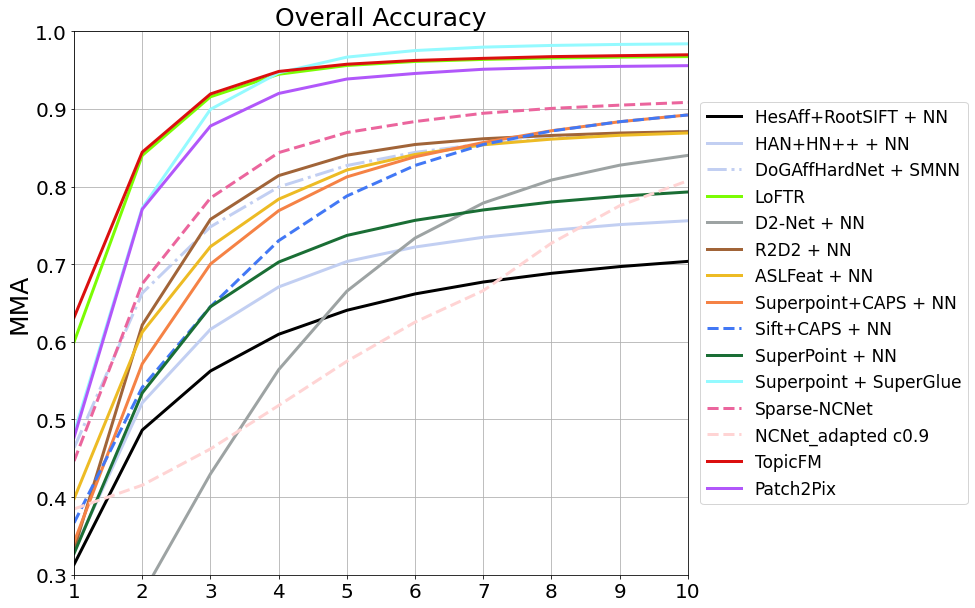

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

n_i = 52
n_v = 56
plt_lim = [1, 10]
plt_rng = np.arange(plt_lim[0], plt_lim[1] + 1)

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

plt.figure(figsize=(11, 10))

plt.subplot(1, 1, 1)
ymin = 0.3
 
for method, name, color, ls in zip(methods, names, colors, linestyles):
    i_err, v_err, _ = errors[method]
    plt.plot(plt_rng, [(i_err[thr] + v_err[thr]) / ((n_i + n_v) * 5) for thr in plt_rng], color=color, ls=ls, linewidth=3, label=name)
plt.title('Overall Accuracy')
plt.xlim(plt_lim)
plt.xticks(plt_rng)
plt.ylabel('MMA')
plt.ylim([ymin, 1])
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=20)

# plt.subplot(1, 3, 2)
# for method, name, color, ls in zip(methods, names, colors, linestyles):
#     i_err, v_err, _ = errors[method]
#     plt.plot(plt_rng, [i_err[thr] / (n_i * 5) for thr in plt_rng], color=color, ls=ls, linewidth=3, label=name)
# plt.title('Illumination')
# plt.xlabel('Threshold [px]')
# plt.xlim(plt_lim)
# plt.xticks(plt_rng)
# plt.ylim([ymin, 1])
# plt.gca().axes.set_yticklabels([])
# plt.grid()
# plt.tick_params(axis='both', which='major', labelsize=20)

# plt.subplot(1, 3, 3)
# for method, name, color, ls in zip(methods, names, colors, linestyles):
#     print (method)
#     i_err, v_err, _ = errors[method]
#     plt.plot(plt_rng, [v_err[thr] / (n_v * 5) for thr in plt_rng], color=color, ls=ls, linewidth=3, label=name)
# plt.title('Viewpoint')
# plt.xlim(plt_lim)
# plt.xticks(plt_rng)
# plt.ylim([ymin, 1])
# plt.gca().axes.set_yticklabels([])
# plt.grid()
# plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=17, loc='center right', bbox_to_anchor=(0, 0, 1.47, 1))
plt.subplots_adjust(wspace=0.01)


plt.savefig('../outputs/hpatches/hseq.pdf', bbox_inches='tight', dpi=300)

